In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [3]:
from multisoc.generate.multidimensional_network import multidimensional_network_fix_av_degree
from multisoc.generate.two_dimensional_population import consol_comp_pop_frac_tnsr

In [4]:
## List of 1d homophily matrices (2 for a two-dimensional system)
h_mtrx_lst = [ 
    np.array([[0.9,0.1],
              [0.1,0.9]]),
    np.array([[0.6,0.4],
              [0.4,0.6]])
]

## The marginals of the population distribution defined by comp_pop_frac_tnsr
## Each row has to sum 1 (100% of the population)
pop_fracs_lst = [
    [0.2,0.8],
    [0.4,0.6]
]

## Generate population distribution with certain level of corrrelation
## No correlation would correspond to the fraction of the largest minority
consol = 0.4 ## Level of correlation
comp_pop_frac_tnsr = consol_comp_pop_frac_tnsr(pop_fracs_lst,consol)

N = 200 ## Number of nodes
m = 20  ## Average number of connections per node

kind = "all" ## Aggregation function: {all->and, one->mean, any->or}
p_d = [0.5, 0.5] ## Weight of each dimension for "mean" aggregation function

G = multidimensional_network_fix_av_degree(
                h_mtrx_lst,
                comp_pop_frac_tnsr,
                kind,
                directed=False, ## Directed or undirected network
                pop_fracs_lst = pop_fracs_lst,
                N=N,
                m=m,
                v = 0,
                p_d = p_d
                )

In [5]:
## Remove isolated nodes and compute positions of nodes
G.remove_nodes_from(list(nx.isolates(G)))
pos = nx.kamada_kawai_layout(G,scale=3)

In [6]:
color_dict = {
    (0,0):"#84e8af",
    (0,1):"#c0cdf9",
    (1,0):"#f0cd6f",
    (1,1):"#ffabb0"
    }
nodelist = G.nodes()
node_colors = [color_dict[G.nodes[i]["attr"]] for i in nodelist]
n = len(G.nodes())
node_size = 40000*(1/(n+200))

degs = np.array([G.degree()[i] for i in nodelist])
node_size_list =  node_size*0.1+(node_size*4-node_size*0.1)*(degs-min(degs))/(max(degs)-min(degs))

C:\Users\csh_samu\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


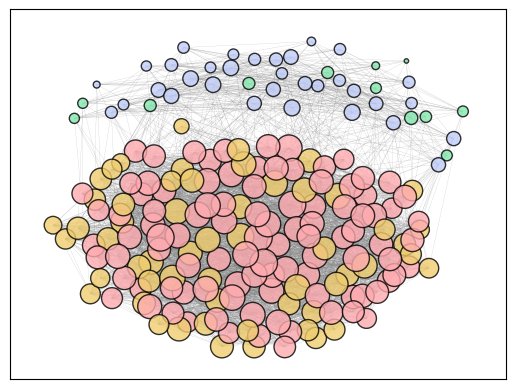

In [7]:
## Draw network
nx.draw_networkx(G,
                     with_labels = False,
                     pos=pos,
                     nodelist=nodelist,
                     node_color=node_colors,
                     node_size=node_size_list,
                     # node_shape=shape_dict[key],
                     width=0.1,
                     alpha = .8,
                     arrowstyle = '-|>',
                     linewidths = 1,
                     edgecolors = 'black',
                     edge_color = 'grey', ## v2
                     # ax=ax
                )